In [7]:
## Feladatok:
# 1. Python Test Explorer for Visual Studio Code telepítés
# 2. Loan Calc függvények meghívása (ismerkedés azzal, hogy mi ez...)
# 3. Line chart készítése a calculate_annuity_cashflow_decomposition függvényhez
# 4. Unittest-ek készítése a unittest package-el
# 5. Unittest-ek készítése a pytest package-el

# A tesztek tartalma:
# a.: sima unittest a calculate_annuity_installment függvényre, ami tesztel a valueError-ra és pár értékre
# b.: pytestben a parametrize-al, unittest-ben egy lista/listák alapján hozzunk létre unittest-eket dinamikusan
# c.: calculate_annuity_cashflow_decomposition függvényre csináljunk egy olyan test case-t ami beolvas egy pandas outputot
# d.: a c rész feladatban az installment számolást mockoljuk meg

# A tesztek megvalósítása:
# 1. Teszteljünk a unittest package-el
# 2. Teszteljünk a pytest package-el

# segítség: 
# Copilot és ChatGpt használható...
# Pytest beállítások: nekem a loan_calc root K:\Thesis\lectures\lecture_12\loan_calc
# lett beállítva a Python › Testing: Cwd nek ill. Python › Testing: Pytest Path -nak...

In [2]:
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, r'D:\programming\WebProg2025Fall\new_materials\lecture_10\loan_calc')
from src.loan_calc import calculate_annuity_installment, calculate_annuity_cashflow_decomposition

In [3]:
monthly_installment = calculate_annuity_installment(
    principal=30000000,
    interest_rate=0.0669,
    tenor=25,
    installment_frequency=12
)
print(f"Monthly installment: {monthly_installment:.2f} HUF")

Monthly installment: 206138.24 HUF


In [4]:
cfs = calculate_annuity_cashflow_decomposition(
    principal=50000000,
    interest_rate=0.0669,
    tenor=25,
    installment_frequency=12
)


Calculated installment is 343563.73004386213


In [5]:
cfs.head()

,time_period,insterest_cf,principal_cf
0,1,278750.000000,64813.730044
1,2,278388.663455,65175.066589
2,3,278025.312459,65538.417585
3,4,277659.935781,65903.794263
4,5,277292.522128,66271.207916


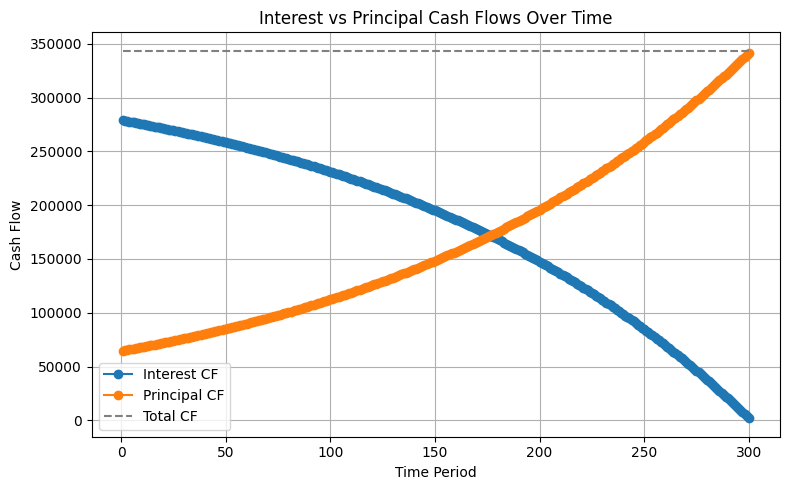

In [6]:
plt.figure(figsize=(8, 5))

# Plot interest cash flow
plt.plot(cfs['time_period'], cfs['insterest_cf'], label='Interest CF', marker='o')

# Plot principal cash flow
plt.plot(cfs['time_period'], cfs['principal_cf'], label='Principal CF', marker='o')

# Optional: plot total (constant over time)
cfs['total_cf'] = cfs['insterest_cf'] + cfs['principal_cf']
plt.plot(cfs['time_period'], cfs['total_cf'], label='Total CF', linestyle='--', color='gray')

plt.xlabel("Time Period")
plt.ylabel("Cash Flow")
plt.title("Interest vs Principal Cash Flows Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
